In [5]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle
import torch
from pathlib import Path
from torchvision import datasets, transforms

In [6]:
os.chdir('/Users/gouse/PycharmProjects/AR-Imperial-Thesis')
os.getcwd()

'/Users/gouse/PycharmProjects/AR-Imperial-Thesis'

## Load the data

In [93]:
feature_names = ["has_bill_shape::dagger", "has_bill_shape::hooked_seabird", "has_bill_shape::all-purpose", "has_bill_shape::cone", "has_wing_color::brown", "has_wing_color::grey", "has_wing_color::yellow", "has_wing_color::black", "has_wing_color::white", "has_wing_color::buff", "has_upperparts_color::brown", "has_upperparts_color::grey", "has_upperparts_color::yellow", "has_upperparts_color::black", "has_upperparts_color::white", "has_upperparts_color::buff", "has_underparts_color::brown", "has_underparts_color::grey", "has_underparts_color::yellow", "has_underparts_color::black", "has_underparts_color::white", "has_underparts_color::buff", "has_breast_pattern::solid", "has_breast_pattern::striped", "has_breast_pattern::multi-colored", "has_back_color::brown", "has_back_color::grey", "has_back_color::yellow", "has_back_color::black"]

feature_names_all = ["has_bill_shape::dagger", "has_bill_shape::hooked_seabird", "has_bill_shape::all-purpose", "has_bill_shape::cone", "has_wing_color::brown", "has_wing_color::grey", "has_wing_color::yellow", "has_wing_color::black", "has_wing_color::white", "has_wing_color::buff", "has_upperparts_color::brown", "has_upperparts_color::grey", "has_upperparts_color::yellow", "has_upperparts_color::black", "has_upperparts_color::white", "has_upperparts_color::buff", "has_underparts_color::brown", "has_underparts_color::grey", "has_underparts_color::yellow", "has_underparts_color::black", "has_underparts_color::white", "has_underparts_color::buff", "has_breast_pattern::solid", "has_breast_pattern::striped", "has_breast_pattern::multi-colored", "has_back_color::brown", "has_back_color::grey", "has_back_color::yellow", "has_back_color::black", "has_back_color::white", "has_back_color::buff", "has_tail_shape::notched_tail", "has_upper_tail_color::brown", "has_upper_tail_color::grey", "has_upper_tail_color::black", "has_upper_tail_color::white", "has_upper_tail_color::buff", "has_head_pattern::eyebrow", "has_head_pattern::plain", "has_breast_color::brown", "has_breast_color::grey", "has_breast_color::yellow", "has_breast_color::black", "has_breast_color::white", "has_breast_color::buff", "has_throat_color::grey", "has_throat_color::yellow", "has_throat_color::black", "has_throat_color::white", "has_throat_color::buff", "has_eye_color::black", "has_bill_length::about_the_same_as_head", "has_bill_length::shorter_than_head", "has_forehead_color::blue", "has_forehead_color::brown", "has_forehead_color::grey", "has_forehead_color::yellow", "has_forehead_color::black", "has_forehead_color::white", "has_under_tail_color::brown", "has_under_tail_color::grey", "has_under_tail_color::black", "has_under_tail_color::white", "has_under_tail_color::buff", "has_nape_color::brown", "has_nape_color::grey", "has_nape_color::yellow", "has_nape_color::black", "has_nape_color::white", "has_nape_color::buff", "has_belly_color::brown", "has_belly_color::grey", "has_belly_color::yellow", "has_belly_color::black", "has_belly_color::white", "has_belly_color::buff", "has_wing_shape::rounded-wings", "has_wing_shape::pointed-wings", "has_size::small_(5_-_9_in)", "has_size::medium_(9_-_16_in)", "has_size::very_small_(3_-_5_in)", "has_shape::duck-like", "has_shape::perching-like", "has_back_pattern::solid", "has_back_pattern::striped", "has_back_pattern::multi-colored", "has_tail_pattern::solid", "has_tail_pattern::striped", "has_tail_pattern::multi-colored", "has_belly_pattern::solid", "has_primary_color::brown", "has_primary_color::grey", "has_primary_color::yellow", "has_primary_color::black", "has_primary_color::white", "has_primary_color::buff", "has_leg_color::grey", "has_leg_color::black", "has_leg_color::buff", "has_bill_color::grey", "has_bill_color::black", "has_bill_color::buff", "has_crown_color::blue", "has_crown_color::brown", "has_crown_color::grey", "has_crown_color::yellow", "has_crown_color::black", "has_crown_color::white", "has_wing_pattern::solid", "has_wing_pattern::spotted", "has_wing_pattern::striped", "has_wing_pattern::multi-colored"]

indices_to_keep_from_or_concept_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

class_names = ["Black_footed_Albatross", "Laysan_Albatross", "Sooty_Albatross", "Groove_billed_Ani", "Crested_Auklet", 
                "Least_Auklet", "Parakeet_Auklet", "Rhinoceros_Auklet", "Brewer_Blackbird", "Red_winged_Blackbird", 
                "Rusty_Blackbird", "Yellow_headed_Blackbird", "Bobolink", "Indigo_Bunting", "Lazuli_Bunting", 
                "Painted_Bunting", "Cardinal", "Spotted_Catbird", "Gray_Catbird", "Yellow_breasted_Chat", "Eastern_Towhee", "Chuck_will_Widow", "Brandt_Cormorant", "Red_faced_Cormorant", "Pelagic_Cormorant", "Bronzed_Cowbird", "Shiny_Cowbird", "Brown_Creeper", "American_Crow", "Fish_Crow", "Black_billed_Cuckoo", "Mangrove_Cuckoo", "Yellow_billed_Cuckoo", "Gray_crowned_Rosy_Finch", "Purple_Finch", "Northern_Flicker", "Acadian_Flycatcher", "Great_Crested_Flycatcher", "Least_Flycatcher", "Olive_sided_Flycatcher", "Scissor_tailed_Flycatcher", 
                "Vermilion_Flycatcher", "Yellow_bellied_Flycatcher", "Frigatebird", "Northern_Fulmar", "Gadwall", 
                "American_Goldfinch", "European_Goldfinch", "Boat_tailed_Grackle", "Eared_Grebe", "Horned_Grebe", 
                "Pied_billed_Grebe", "Western_Grebe", "Blue_Grosbeak", "Evening_Grosbeak", "Pine_Grosbeak", 
                "Rose_breasted_Grosbeak", "Pigeon_Guillemot", "California_Gull", "Glaucous_winged_Gull", "Heermann_Gull", "Herring_Gull", "Ivory_Gull", "Ring_billed_Gull", "Slaty_backed_Gull", "Western_Gull","Anna_Hummingbird", "Ruby_throated_Hummingbird", "Rufous_Hummingbird", "Green_Violetear", "Long_tailed_Jaeger", "Pomarine_Jaeger", "Blue_Jay", "Florida_Jay", "Green_Jay", "Dark_eyed_Junco", "Tropical_Kingbird", "Gray_Kingbird", "Belted_Kingfisher", "Green_Kingfisher", "Pied_Kingfisher", "Ringed_Kingfisher", "White_breasted_Kingfisher", "Red_legged_Kittiwake", "Horned_Lark", "Pacific_Loon", "Mallard", "Western_Meadowlark", "Hooded_Merganser", "Red_breasted_Merganser", "Mockingbird", "Nighthawk", "Clark_Nutcracker", "White_breasted_Nuthatch", "Baltimore_Oriole", "Hooded_Oriole", "Orchard_Oriole", "Scott_Oriole", "Ovenbird", "Brown_Pelican", "White_Pelican", "Western_Wood_Pewee", "Sayornis", "American_Pipit", "Whip_poor_Will", "Horned_Puffin", "Common_Raven", "White_necked_Raven", "American_Redstart", "Geococcyx", "Loggerhead_Shrike", "Great_Grey_Shrike", "Baird_Sparrow", "Black_throated_Sparrow", "Brewer_Sparrow", "Chipping_Sparrow", "Clay_colored_Sparrow", "House_Sparrow", "Field_Sparrow", "Fox_Sparrow", "Grasshopper_Sparrow", "Harris_Sparrow", "Henslow_Sparrow", "Le_Conte_Sparrow", "Lincoln_Sparrow", "Nelson_Sharp_tailed_Sparrow", "Savannah_Sparrow", "Seaside_Sparrow", "Song_Sparrow",  "Tree_Sparrow", "Vesper_Sparrow", "White_crowned_Sparrow", "White_throated_Sparrow", "Cape_Glossy_Starling", "Bank_Swallow", "Barn_Swallow", "Cliff_Swallow", "Tree_Swallow", "Scarlet_Tanager", "Summer_Tanager", "Artic_Tern", "Black_Tern", "Caspian_Tern", "Common_Tern", "Elegant_Tern", "Forsters_Tern", "Least_Tern", "Green_tailed_Towhee", "Brown_Thrasher", "Sage_Thrasher", "Black_capped_Vireo", "Blue_headed_Vireo",  "Philadelphia_Vireo", "Red_eyed_Vireo", "Warbling_Vireo", "White_eyed_Vireo", "Yellow_throated_Vireo", "Bay_breasted_Warbler", "Black_and_white_Warbler", "Black_throated_Blue_Warbler", "Blue_winged_Warbler", "Canada_Warbler", "Cape_May_Warbler", "Cerulean_Warbler", "Chestnut_sided_Warbler", "Golden_winged_Warbler", "Hooded_Warbler", "Kentucky_Warbler", "Magnolia_Warbler", "Mourning_Warbler", "Myrtle_Warbler",  "Nashville_Warbler", "Orange_crowned_Warbler", "Palm_Warbler", "Pine_Warbler", "Prairie_Warbler", "Prothonotary_Warbler", "Swainson_Warbler", "Tennessee_Warbler", "Wilson_Warbler", "Worm_eating_Warbler", "Yellow_Warbler", "Northern_Waterthrush", "Louisiana_Waterthrush", "Bohemian_Waxwing", "Cedar_Waxwing", "American_Three_toed_Woodpecker", "Pileated_Woodpecker", "Red_bellied_Woodpecker", "Red_cockaded_Woodpecker", "Red_headed_Woodpecker", "Downy_Woodpecker", "Bewick_Wren", "Cactus_Wren", "Carolina_Wren", "House_Wren", "Marsh_Wren", "Rock_Wren", "Winter_Wren", "Common_Yellowthroat"]

print(len(class_names))
# mapping from feature index to feature name
feature_index_to_name = {i: feature_name for i, feature_name in enumerate(feature_names)}
# mapping from feature name to feature index
feature_name_to_index = {feature_name: i for i, feature_name in enumerate(feature_names)}
# mapping from class index to class name
class_index_to_name = {i: class_name for i, class_name in enumerate(class_names)}
# mapping from class name to class index
class_name_to_index = {class_name: i for i, class_name in enumerate(class_names)}
# mapping from all feature index to feature name
feature_all_index_to_name = {i: feature_name for i, feature_name in enumerate(feature_names_all)}

200


In [30]:
from data_loaders.CUB_data_loader import CUBDataset, ImbalancedDatasetSampler, BatchSampler
from torch.utils.data import Dataset, DataLoader,TensorDataset

def load_cub_data(pkl_paths, use_attr, no_img, batch_size,
                  uncertain_label=False, n_class_attr=2, image_dir='images',
                  resampling=False, resol=299,
                  normalizer=transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                  std=[2, 2, 2]),
                  n_classes=200, reduced_concepts=False):

    transform = transforms.Compose([
            transforms.CenterCrop(resol),
            transforms.ToTensor(),
        ])
    dataset = CUBDataset(pkl_paths, use_attr, no_img, uncertain_label,
                         image_dir, n_class_attr, n_classes, transform=transform,
                         reduced_concepts=reduced_concepts)
    
    is_training = any(['train.pkl' in f for f in pkl_paths])
    if is_training:
        drop_last = True
        shuffle = True
    else:
        drop_last = False
        shuffle = False
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,
                        drop_last=drop_last)
    return loader

In [31]:
num_classes = 200
reduced_concepts = indices_to_keep_from_or_concept_list
CUB_PROCESSED_DIR = Path("datasets/CUB/class_attr_data_10")
CUB_DATA_DIR = Path("datasets/CUB/CUB_200_2011")
N_ATTRIBUTES = 312

TRAIN_PKL = str(CUB_PROCESSED_DIR) + "/train.pkl"
VAL_PKL = str(CUB_PROCESSED_DIR) + "/val.pkl"
TEST_PKL = str(CUB_PROCESSED_DIR) + "/test.pkl"
normalizer = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
train_loader = load_cub_data([TRAIN_PKL], use_attr=True, no_img=False,
                             batch_size=64,
                             uncertain_label=False, image_dir=str(CUB_DATA_DIR),
                             resol=224, normalizer=normalizer,
                             n_classes=num_classes, resampling=False,
                             reduced_concepts=reduced_concepts)

val_loader = load_cub_data([VAL_PKL], use_attr=True, no_img=False,
                             batch_size=64,
                             uncertain_label=False, image_dir=str(CUB_DATA_DIR),
                             resol=224, normalizer=normalizer,
                             n_classes=num_classes, resampling=False,
                             reduced_concepts=reduced_concepts)

test_loader = load_cub_data([TEST_PKL], use_attr=True, no_img=False,
                            batch_size=64,
                            uncertain_label=False, image_dir=str(CUB_DATA_DIR),
                            resol=224, normalizer=normalizer,
                            n_classes=num_classes, resampling=False,
                            reduced_concepts=reduced_concepts)

print(len(train_loader.dataset), "training set size")
print(len(val_loader.dataset), "validation set size")
print(len(test_loader.dataset), "test set size")

Reduced length of data attributes to 29
Reduced length of data attributes to 29
Reduced length of data attributes to 29
4796 training set size
1198 validation set size
5794 test set size


#### Plot a CUB image

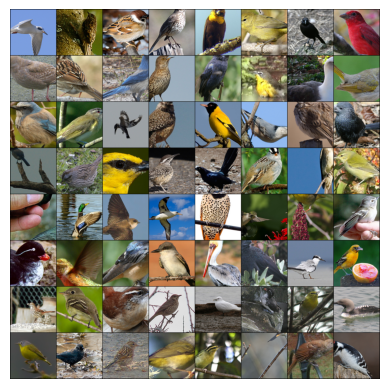

In [42]:
import torchvision

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.grid(False)
    plt.axis('off')
    plt.show()
    
# get some random training images
dataiter = iter(train_loader)
images, concepts, labels  = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))



#### Load predictions per leaf

In [33]:
output_path = "/Users/gouse/PycharmProjects/AR-Imperial-Thesis/analysis/CUB/train_dicts"

In [34]:
with open(os.path.join(output_path, 'leaf_samples_indices.pkl'), 'rb') as f:
    leaf_samples_indices = pkl.load(f)
with open(os.path.join(output_path, 'leaf_features_per_path.pkl'), 'rb') as f:
    leaf_features_per_path = pkl.load(f)
with open(os.path.join(output_path, 'new_leaves_per_leaf_samples_indices.pkl'), 'rb') as f:
    new_leaves_per_leaf_samples_indices = pkl.load(f)
with open(os.path.join(output_path, 'new_leaves_per_leaf_features_per_path.pkl'), 'rb') as f:
    new_leaves_per_leaf_features_per_path = pkl.load(f)
with open(os.path.join(output_path, 'C_leaf_pred_dict.pkl'), 'rb') as f:
    C_leaf_pred_dict = pkl.load(f)
with open(os.path.join(output_path, 'C_leaf_dict.pkl'), 'rb') as f:
    C_leaf_dict = pkl.load(f)
with open(os.path.join(output_path, 'y_leaf_dict.pkl'), 'rb') as f:
    y_leaf_dict = pkl.load(f)
with open(os.path.join(output_path, 'y_original_pred_dict.pkl'), 'rb') as f:
    y_original_pred_dict = pkl.load(f)
with open(os.path.join(output_path, 'y_pred_dict.pkl'), 'rb') as f:
    y_pred_dict = pkl.load(f)

In [35]:
# map the leaf_samples_indices to a scaling from 0 to n_samples
leaf_samples_indices_mapping = {}
leaf_samples_indices_mapping_inv = {}
for leaf, samples in leaf_samples_indices.items():
    leaf_samples_indices_mapping[leaf] = {i : samples[i] for i in range(len(samples))}
    leaf_samples_indices_mapping_inv[leaf] = {samples[i]: i for i in range(len(samples))}

for leaf, new_leaves in new_leaves_per_leaf_samples_indices.items():
    for new_leaf, samples in new_leaves.items():
        for i in range(len(samples)):
            new_leaves_per_leaf_samples_indices[leaf][new_leaf][i] = leaf_samples_indices_mapping[leaf][samples[i]]

#### Sanity check: Show ground truth concepts of bird with original index 12 in leaf 261

In [39]:
leaf_samples_indices_mapping_inv[261]

{12: 0,
 137: 1,
 237: 2,
 635: 3,
 662: 4,
 709: 5,
 731: 6,
 973: 7,
 990: 8,
 1006: 9,
 1028: 10,
 1082: 11,
 1107: 12,
 1192: 13,
 1345: 14,
 1369: 15,
 1614: 16,
 1892: 17,
 2075: 18,
 2106: 19,
 2317: 20,
 2344: 21,
 2421: 22,
 2467: 23,
 2519: 24,
 2621: 25,
 2808: 26,
 3014: 27,
 3016: 28,
 3143: 29,
 3239: 30,
 3395: 31,
 3460: 32,
 3654: 33,
 4064: 34,
 4212: 35,
 4241: 36,
 4244: 37,
 4260: 38,
 4382: 39,
 4385: 40,
 4432: 41,
 4456: 42,
 4547: 43,
 4744: 44}

In [40]:
new_leaves_per_leaf_samples_indices[261][2]

array([  12,  137,  662, 1345, 1614, 1892, 2344, 2519, 2621, 2808, 3014,
       3016, 3143, 3654, 4212, 4241, 4385, 4432, 4456, 4547])

In [88]:
print(C_leaf_dict[261][leaf_samples_indices_mapping_inv[261][12]])
image, concepts, label = train_loader.dataset.__getitem__(12)
print(concepts)
print(label)

[1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1.]
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.])
188


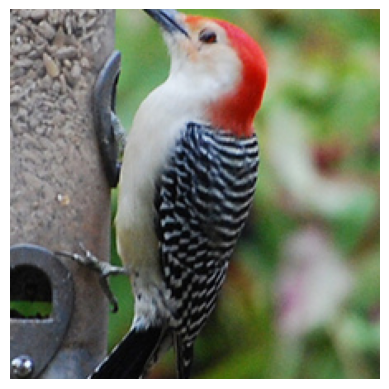

In [89]:
npimg = image.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.grid(False)
plt.axis('off')
plt.show()

## Plot the birds of all classes ending up in leaf 261 in the Hard Tree

In [106]:
def load_cub_data_all(pkl_paths, use_attr, no_img, batch_size,
                  uncertain_label=False, n_class_attr=2, image_dir='images',
                  resampling=False, resol=299,
                  normalizer=transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                  std=[2, 2, 2]),
                  n_classes=200, reduced_concepts=None):

    transform = transforms.Compose([
            transforms.CenterCrop(resol),
            transforms.ToTensor(),
        ])
    dataset = CUBDataset(pkl_paths, use_attr, no_img, uncertain_label,
                         image_dir, n_class_attr, n_classes, transform=transform,
                         reduced_concepts=reduced_concepts)
    
    is_training = any(['train.pkl' in f for f in pkl_paths])
    if is_training:
        drop_last = True
        shuffle = True
    else:
        drop_last = False
        shuffle = False
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,
                        drop_last=drop_last)
    return loader

In [107]:
TRAIN_PKL = str(CUB_PROCESSED_DIR) + "/train.pkl"
normalizer = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[2, 2, 2])
train_loader_all = load_cub_data_all([TRAIN_PKL], use_attr=True, no_img=False,
                             batch_size=64,
                             uncertain_label=False, image_dir=str(CUB_DATA_DIR),
                             resol=224, normalizer=normalizer,
                             n_classes=num_classes, resampling=False,
                             reduced_concepts=None)

image, concepts_all_red_bellied, label = train_loader_all.dataset.__getitem__(12)
image, concepts_all_red_headed, label = train_loader_all.dataset.__getitem__(237)
print(concepts_all_red_bellied)
print(concepts_all_red_headed)

tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.,

In [111]:
print("Available concepts for the two classes")
concepts_equal_to_one = []
for idx, i in enumerate(concepts):
    if i == 1:
        concepts_equal_to_one.append(feature_index_to_name[idx])

print(concepts_equal_to_one)
print("\n")

print("Original concepts of Red bellied Woodpecker")
concepts_all_equal_to_one = []
for idx, i in enumerate(concepts_all_red_bellied):
    if i == 1:
        concepts_all_equal_to_one.append(feature_all_index_to_name[idx])

print(concepts_all_equal_to_one)
print("\n")

print("Original concepts of Red headed Woodpecker")
concepts_all_equal_to_one = []
for idx, i in enumerate(concepts_all_red_headed):
    if i == 1:
        concepts_all_equal_to_one.append(feature_all_index_to_name[idx])

print(concepts_all_equal_to_one)
print("\n")

print("Concepts that the Red bellied Woodpecker has and the Red headed Woodpecker does not have")
concepts_all_equal_to_one = []
for idx, i in enumerate(concepts_all_red_bellied):
    if i == 1 and concepts_all_red_headed[idx] == 0:
        concepts_all_equal_to_one.append(feature_all_index_to_name[idx])
        
print(concepts_all_equal_to_one)
print("\n")

print("Concepts that the Red headed Woodpecker has and the Red bellied Woodpecker does not have")
concepts_all_equal_to_one = []
for idx, i in enumerate(concepts_all_red_headed):
    if i == 1 and concepts_all_red_bellied[idx] == 0:
        concepts_all_equal_to_one.append(feature_all_index_to_name[idx])
        
print(concepts_all_equal_to_one)

Available concepts for the two classes
['has_bill_shape::dagger', 'has_wing_color::black', 'has_wing_color::white', 'has_upperparts_color::black', 'has_upperparts_color::white', 'has_underparts_color::white', 'has_breast_pattern::solid', 'has_back_color::black']


Original concepts of Red bellied Woodpecker
['has_bill_shape::dagger', 'has_wing_color::black', 'has_wing_color::white', 'has_upperparts_color::black', 'has_upperparts_color::white', 'has_underparts_color::white', 'has_breast_pattern::solid', 'has_back_color::black', 'has_back_color::white', 'has_upper_tail_color::black', 'has_upper_tail_color::white', 'has_breast_color::white', 'has_throat_color::white', 'has_eye_color::black', 'has_bill_length::about_the_same_as_head', 'has_under_tail_color::black', 'has_under_tail_color::white', 'has_wing_shape::pointed-wings', 'has_size::small_(5_-_9_in)', 'has_back_pattern::striped', 'has_belly_pattern::solid', 'has_primary_color::black', 'has_primary_color::white', 'has_leg_color::grey'

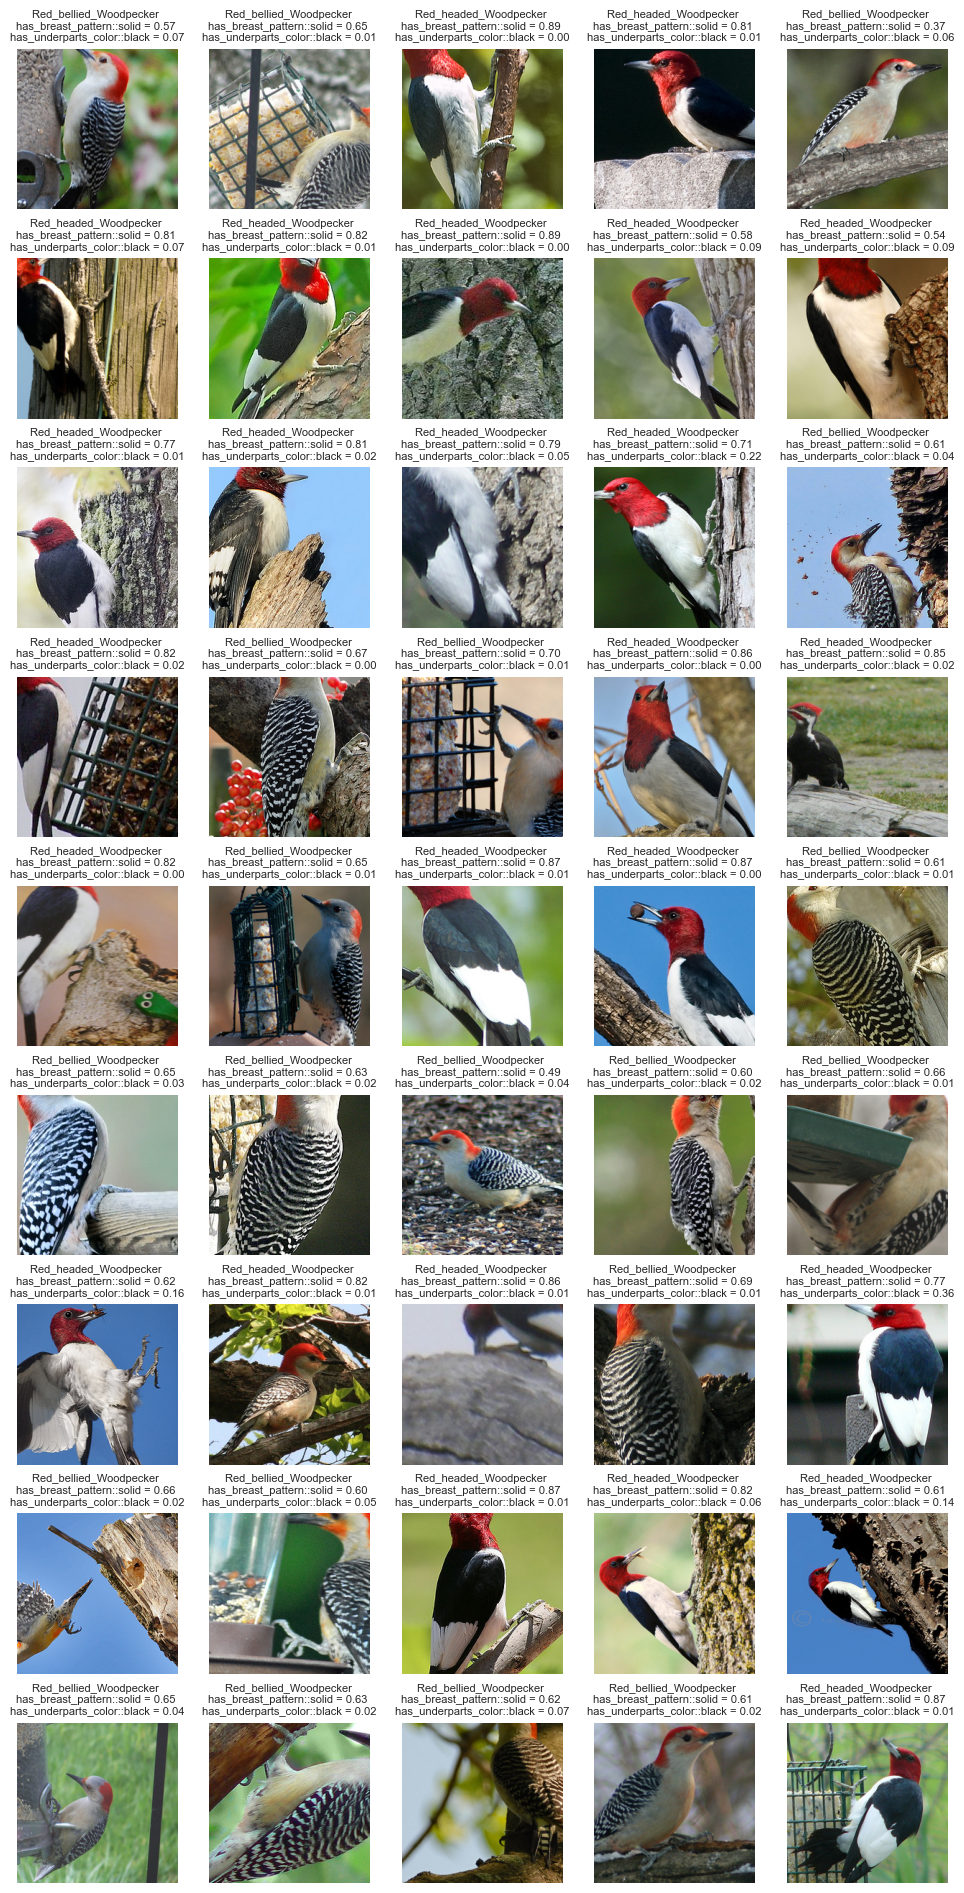

In [87]:
or_indices = list(leaf_samples_indices_mapping_inv[261])
feature_splits = ["has_breast_pattern::solid", "has_underparts_color::black"]
indices_of_feature_splits = [feature_name_to_index[feature] for feature in feature_splits]

images = []
labels = []
prob_breast = []
prob_color = []
for i, idx in enumerate(or_indices):
    image, concepts, label = train_loader.dataset.__getitem__(idx)
    images.append(image)
    labels.append(label)
    
    # get the probabilities of the features
    prob_breast.append(C_leaf_pred_dict[261][i][indices_of_feature_splits[0]])
    prob_color.append(C_leaf_pred_dict[261][i][indices_of_feature_splits[1]])

# plot 100 digits in a grid of 5 digits per row
fig, ax = plt.subplots(9, 5, figsize=(12, 24))
for i in range(9):
    for j in range(5):
        imgs = images[i * 5 + j]
        probs_breast = prob_breast[i * 5 + j]
        probs_color = prob_color[i * 5 + j]
        npimg = imgs.numpy()
        ax[i, j].imshow(np.transpose(npimg, (1, 2, 0)))
        ax[i, j].set_title(f"{class_index_to_name[labels[i * 5 + j]]} \nhas_breast_pattern::solid = {probs_breast:.2f} \nhas_underparts_color::black = {probs_color:.2f}", fontsize = 8)
        ax[i, j].grid(False)
        ax[i, j].axis('off')

### Collect all samples in leaf 18 having the concept 7 equal to 1

In [53]:
# Collect all samples in leaf 18 having the concept 7 equal to 1
indices = np.where(C_leaf_dict[18][:, 7] > 0.5)[0]
predictions = C_leaf_pred_dict[18][indices, 11]
prediction_indices = [i for i in range(len(predictions))]
indices_train = [leaf_samples_indices_mapping[18][idx] for idx in indices]
indices_all = [train_index_to_or_index[idx] for idx in indices_train]

# create a mapping from the prediction indices to the original indices
prediction_indices_mapping_inv = {indices_all[i]: idx for i, idx in enumerate(prediction_indices)}

data = {}
for idx, idx_or in zip(prediction_indices, indices_all):
    data[idx_or] = {}
    data[idx_or]["prediction"] = predictions[idx]
    data[idx_or]["true_value"] = targets[idx_or, 2]
    data[idx_or]["class"] = y[idx_or]
    
# sanity check
print(predictions[prediction_indices_mapping_inv[5114]])
print(predictions[prediction_indices_mapping_inv[9246]])

0.9854037
0.99938774


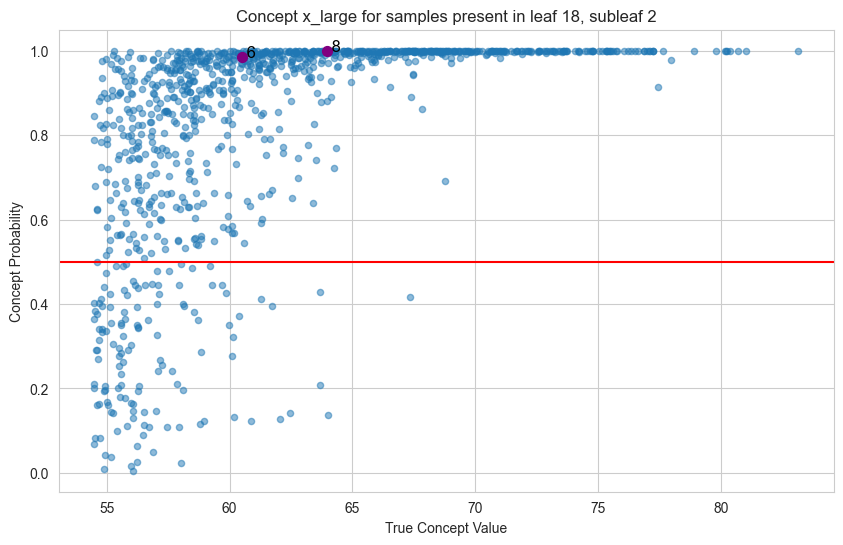

In [54]:
# make a scatter plot for the dictionary with the true values on the x-axis and the predictions on the y-axis
true_values = [data[idx]["true_value"] for idx in data]
predictions = [data[idx]["prediction"] for idx in data]
classes = [data[idx]["class"] for idx in data]

plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, s=20, alpha=0.5)

# Highlight specific points
for idx in [5114, 9246]:
    plt.scatter(data[idx]["true_value"], data[idx]["prediction"], color='purple', s=50)  # Red dots for highlighted points
    plt.text(data[idx]["true_value"], data[idx]["prediction"], f' {class_index_to_name[data[idx]["class"]]}', color='black', fontsize=12)  # Class annotation

plt.xlabel("True Concept Value")
plt.ylabel("Concept Probability")
plt.axhline(y=0.5, color='r', linestyle='-')
plt.title("Concept x_large for samples present in leaf 18, subleaf 2")
plt.show()


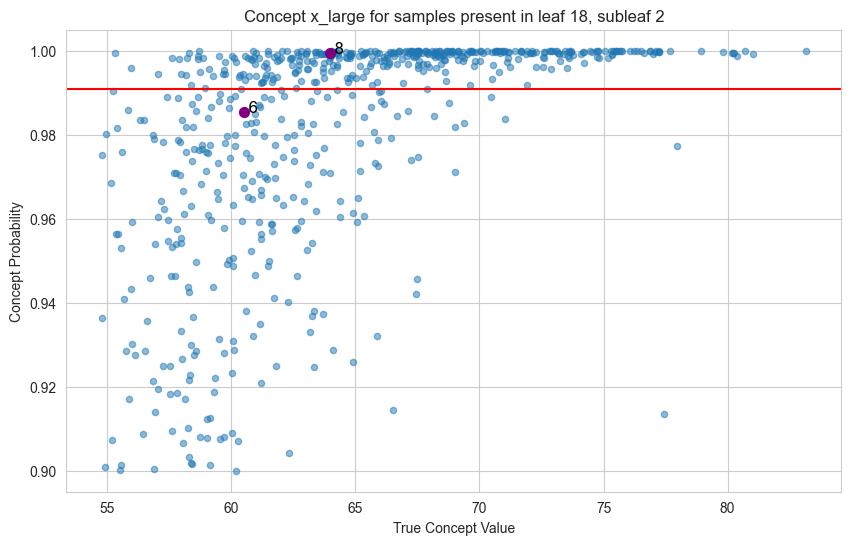

In [55]:
# make a scatter plot for the dictionary with the true values on the x-axis and the predictions on the y-axis
true_values = [data[idx]["true_value"] for idx in data if data[idx]["prediction"] > 0.9]
predictions = [data[idx]["prediction"] for idx in data if data[idx]["prediction"] > 0.9]
classes = [data[idx]["class"] for idx in data if data[idx]["prediction"] > 0.9]

plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, s=20, alpha=0.5)

# Highlight specific points
for idx in [5114, 9246]:
    plt.scatter(data[idx]["true_value"], data[idx]["prediction"], color='purple', s=50)  # Red dots for highlighted points
    plt.text(data[idx]["true_value"], data[idx]["prediction"], f' {class_index_to_name[data[idx]["class"]]}', color='black', fontsize=12)  # Class annotation

plt.xlabel("True Concept Value")
plt.ylabel("Concept Probability")
plt.axhline(y=0.991, color='r', linestyle='-')
plt.title("Concept x_large for samples present in leaf 18, subleaf 2")
plt.show()
